<a href="https://colab.research.google.com/github/Malaaaa/final/blob/main/art.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
  from google.colab import drive
  import gc
  gc.collect()
  
  drive.mount('/content/drive') 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
import numpy as np
import nibabel as nib 
from nibabel import  processing
import matplotlib.pyplot as plt 
import tensorflow as tf
%env SM_FRAMEWORK=tf.keras
!pip install segmentation_models
import segmentation_models as sm

env: SM_FRAMEWORK=tf.keras
Segmentation Models: using `tf.keras` framework.


In [5]:
import pickle


In [6]:
BACKBONE = 'resnet34'


In [7]:
filepath = '/content/drive/MyDrive/ds000224/'
dirnames = [s for s in os.listdir(filepath) if s.startswith('sub')]
filename = [f for f in os.listdir(filepath+dirnames[0]) ]

In [8]:
filename

['t1s.nii.gz', 'tofar_in_t1s.nii.gz', 't1.nii.gz', 'tofar_in_t1.nii.gz']

In [9]:
def min_max(x):
    # x: numpy array
    x = (x - np.min(x)) / (np.max(x) - np.min(x))
    return x

In [10]:
# # define model
# model = sm.Unet(BACKBONE, input_shape=(None,None,3),encoder_weights='imagenet')
# model.compile(
#     'Adamax',
#     loss=sm.losses.bce_jaccard_loss,
#     metrics=[sm.metrics.iou_score],
# )

In [11]:
model = tf.keras.models.load_model('/content/drive/MyDrive/saved_model/9Adamax', custom_objects={'iou_score':sm.metrics.iou_score,'binary_crossentropy_plus_jaccard_loss':sm.losses.bce_jaccard_loss})

In [12]:
groundsegs = [nib.load(filepath+dirnames[0]+'/tofar_in_t1.nii.gz').get_data().astype(np.float32)]
t1s = [nib.load(filepath+dirnames[0]+'/t1.nii.gz').get_data().astype(np.float32) ]
print("t1s shape = " + str(t1s[0].shape) + " groundsegs shape = " + str(groundsegs[0].shape))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


t1s shape = (224, 256, 256) groundsegs shape = (224, 256, 256)


In [13]:
for s in range(len(groundsegs)):
  groundsegs[s][groundsegs[s]<0.5] = 0
  groundsegs[s][groundsegs[s]>=0.5] = 1
  t1s[s] = min_max(t1s[s])  

for i in range(len(groundsegs)):
  # x,y,z = groundsegs[i].shape
  # a= np.zeros(z)
  # for j in  range(z):
  #   a[j]= np.sum(groundsegs[i][:,:,j])
  # min = np.min(a.nonzero())
  # max = np.max(a.nonzero())
  # groundsegs[i] = np.swapaxes(groundsegs[i][int(x%32*0.5):-int(x%32*0.5),:,min:max],0,2)
  # t1s[i] = np.swapaxes(t1s[i][int(x%32*0.5):-int(x%32*0.5),:,min:max],0,2)
  groundsegs[i] = np.swapaxes(groundsegs[i][:,:,90:220],0,2)
  t1s[i] = np.swapaxes(t1s[i][:,:,90:220],0,2)  
for i in range(len(groundsegs)):

  groundsegs[i] = np.expand_dims(groundsegs[i],axis=3)
  t1s[i] = np.expand_dims(t1s[i],axis=3)
  t1s[i] = np.tile(t1s[i],[1,1,1,3])
print("t1 shape = " + str(t1s[i].shape) + " groundseg shape = " + str(groundsegs[i].shape))

t1 shape = (130, 256, 224, 3) groundseg shape = (130, 256, 224, 1)


Text(0.5, 1.0, 'original')

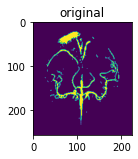

In [14]:
plt.subplot(1,3,1); plt.imshow(np.max(groundsegs[0][:,:,:,0],axis=0)); plt.title('original')


In [ ]:
for p in range(10):
  groundsegs = [nib.load(filepath+d+'/tofar_in_t1.nii.gz').get_data().astype(np.float32) for d in dirnames[2*p:2*p+2]]
  t1s = [nib.load(filepath+d+'/t1.nii.gz').get_data().astype(np.float32) for d in dirnames[2*p:2*p+2]]
  print("t1s shape = " + str(t1s[0].shape) + " groundsegs shape = " + str(groundsegs[0].shape))
  print("swapping axes...")
  for s in range(len(groundsegs)):
    groundsegs[s][groundsegs[s]<0.5] = 0
    groundsegs[s][groundsegs[s]>=0.5] = 1
    t1s[s] = min_max(t1s[s]) 

  for i in range(len(groundsegs)):
    x,y,z = groundsegs[i].shape
    a= np.zeros(z)
    for j in  range(z):
      a[j]= np.sum(groundsegs[i][:,:,j])
    min = np.min(a.nonzero())
    max = np.max(a.nonzero())
    groundsegs[i] = np.swapaxes(groundsegs[i][int(x%32*0.5):-int(x%32*0.5),:,min:max],0,2)
    t1s[i] = np.swapaxes(t1s[i][int(x%32*0.5):-int(x%32*0.5),:,min:max],0,2)
    # groundsegs[i] = np.swapaxes(groundsegs[i][:,:,110:190],0,2)
    # t1s[i] = np.swapaxes(t1s[i][:,:,110:190],0,2)

  
  print("t1 shape = " + str(t1s[i].shape) + " groundseg shape = " + str(groundsegs[i].shape))
  print("expanding dimensions and tiling input...")
  for i in range(len(groundsegs)):

    groundsegs[i] = np.expand_dims(groundsegs[i],axis=3)
    t1s[i] = np.expand_dims(t1s[i],axis=3)
    t1s[i] = np.tile(t1s[i],[1,1,1,3])
  print("t1 shape = " + str(t1s[i].shape) + " groundseg shape = " + str(groundsegs[i].shape))
  x_train = t1s[0]
  y_train = groundsegs[0]

  x_val = t1s[1]
  y_val = groundsegs[1]   
  print("x_train shape = " + str(x_train.shape) + " x_val shape = " + str(x_val.shape))
  print("y_train shape = " + str(y_train.shape) + " y_val shape = " + str(y_val.shape))
  history = model.fit(
      x=x_train,
      y=y_train,
      batch_size=16,
      epochs=100,
      validation_data=(x_val, y_val),
    )
  # model.save('/content/drive/MyDrive/saved_model/d'+str(p)+'Adamax')
  # with open('/content/drive/MyDrive/saved_model/d'+str(p)+'trainHistoryDict.txt', 'wb') as file_pi:
  #   pickle.dump(history.history, file_pi)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until


t1s shape = (224, 256, 256) groundsegs shape = (224, 256, 256)
swapping axes...
t1 shape = (162, 256, 0) groundseg shape = (162, 256, 0)
expanding dimensions and tiling input...
t1 shape = (162, 256, 0, 3) groundseg shape = (162, 256, 0, 1)
x_train shape = (175, 256, 0, 3) x_val shape = (162, 256, 0, 3)
y_train shape = (175, 256, 0, 1) y_val shape = (162, 256, 0, 1)
Epoch 1/100


In [15]:
pred = model.predict(t1s[0])


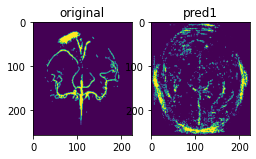

In [16]:
plt.subplot(1,3,1); plt.imshow(np.max(groundsegs[0][:,:,:,0],axis=0)); plt.title('original')
plt.subplot(1,3,2); plt.imshow(np.max(pred[:,:,:,0],axis=0)); plt.title('pred1')
plt.show()

In [13]:
model.save('/content/drive/MyDrive/saved_model/9Adamax')


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved_model/9Adamax/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
